# Machine Learning Lab 1

### Saurabh Shinde(46919851) and Xuemin Zhang (46874559)

## 1) Business Understanding

a) Overview of the Dataset -
Banks have been using interactive techniques like Telemarketing to offer products like Long term deposit to the customers. A telemarketer solicits prospective customers via the phone to make a sale of merchandise or service. A database of potential customers can benefit greatly from the direct marketing such as communication, advertisement and analysis.

Our objective is to focus on the quality of prospect data, attempting to predict the expected customers that have a higher probability to subscribe the deposit by using data mining technique. To understand customer behavior, many banks have adopted the predictive technique based on machine learning to predict the customer data for classifying the customers before offering special services.

This study considers real data provided by The UCI Machine Learning Repository. This dataset was collected from a Portuguese retail bank, from May 2008 to June 2013, in a total of 41,188 phone contacts. The dataset is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

We will be making analyses of the different factors which can affect the term deposit subscription by the customer through telemarketing. Also we will try to predict the target customers which will subscribe for the term deposit.

b) As we mentioned earlier, the purpose of this dataset is to devise a bank marketing strategy to get more customers enrolled in the term deposit scheme. This dataset is complete of important information about customer survey done in the past. It contains detailed information of the contacted customer such as his age, marital status, educational background, duration of the call to the customer etc. We will mine important information such as how the education background, marital status and age etc. affect the customer's decision to subscribe to a term deposit.
We have done research about the attributes and apply some attributes to train a classification model to get a good prediction rate. And we also get some insights from the visualization part that can be used for bank marketing strategy. For this project, the best measure of our classification model is prediction accuracy of client subscription.




# 2) Data Understanding

The dataset is composed of 21 attributes including a label attribute shown in Table 1.

<img src="files/table1.png" width = "750", height = "750">

The above table shows different attributes that are present in the dataset. There are lot of categorical data in the form of customer background information. We will be mining for important customer background information and analysing between different attributes. Apart from that, the dataset also has information such as Employment Variation rate, consumer price index, consumer confidence index, 3 month Euribor rate, number of employed at the time of the call.


In [115]:
# Import the dataset which is in the csv format into pandas Dataframe.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
bank_additional_full = pd.read_csv("bank-additional-full.csv")
bank_additional_full
#We have created a pandas dataframe. And from the Dataframe we know that there are few unknown values in the attritubes.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [116]:
bank_additional_full.head() # View the first five rows.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [117]:
bank_additional_full.tail() # View the last five rows.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [118]:
bank_additional_full.columns.tolist() # View all the attributes in the dataframe.

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [119]:
bank_additional_full.sort_values("age", inplace = True) # Sort the Dataframe by "age" column.
bank_additional_df = bank_additional_full.reset_index(drop = True) # Reset the index for Dataframe.
bank_additional_df # Rename the Dataframe.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,17,student,single,unknown,no,no,yes,cellular,oct,tue,...,1,2,2,success,-3.4,92.431,-26.9,0.742,5017.5,yes
1,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,...,2,999,1,failure,-2.9,92.201,-31.4,0.869,5076.2,yes
2,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,2,999,2,failure,-2.9,92.201,-31.4,0.869,5076.2,no
3,17,student,single,unknown,no,yes,no,cellular,aug,wed,...,3,4,2,success,-2.9,92.201,-31.4,0.884,5076.2,no
4,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,3,4,2,success,-2.9,92.201,-31.4,0.869,5076.2,no
5,18,student,single,high.school,no,no,no,cellular,nov,fri,...,2,7,2,failure,-3.4,92.649,-30.1,0.714,5017.5,yes
6,18,student,single,high.school,no,no,no,telephone,nov,thu,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.245,5195.8,no
7,18,student,single,basic.6y,no,yes,no,cellular,aug,mon,...,1,999,0,nonexistent,-2.9,92.201,-31.4,0.861,5076.2,no
8,18,student,single,high.school,no,yes,yes,cellular,mar,tue,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.687,5099.1,no
9,18,student,single,unknown,no,yes,no,cellular,sep,fri,...,1,999,0,nonexistent,-3.4,92.379,-29.8,0.803,5017.5,yes


## Data Quality Issues.

There are some viable actions that can be taken to dealing with data quality issues. Like exclude the data, accept the data if the error is within our tolerance limits or insert a default value.

We do analysis of missing/unknown values in all the attributes and statistics of missing values are given below.

In [120]:
bank_additional_df["job"].value_counts() # Simple statistic calculation on each job type. 
# There are 330 unknown values in this attribute.

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [121]:
bank_additional_df["marital"].value_counts() # Simple statistic calculation on different marital status.
#Also there are 80 unknown values.

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [122]:
bank_additional_df["education"].value_counts() # Simple statistic calculation on different education background.
# There are 1731 unknown values in this attribute.

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

After observing the statistic calculations from all the attributes, 

We found that there are less than **20% values missing out of the total values**. Hence we decided that we will eliminate all the missing values. Apart from that the overall quality of the data set is found to be very good.



In [123]:
# There are many "unknown" value in each column and we can remove it from dataset by implementing following code.
job_miss = bank_additional_df["job"] == "unknown"
bank_df_without_job_miss = bank_additional_df[job_miss == False]
mar_miss = bank_df_without_job_miss["marital"] == "unknown"
bank_df_without_job_mar_miss = bank_df_without_job_miss[mar_miss == False]
edu_miss = bank_df_without_job_mar_miss["education"] == "unknown"
bank_df_without_job_mar_edu_miss = bank_df_without_job_mar_miss[edu_miss == False]
defau_miss = bank_df_without_job_mar_edu_miss["default"] == "unknown"
bank_df_without_job_mar_edu_defau_miss = bank_df_without_job_mar_edu_miss[defau_miss == False]
hous_miss = bank_df_without_job_mar_edu_defau_miss["housing"] == "unknown"
bank_df_without_job_mar_edu_defau_hous_miss = bank_df_without_job_mar_edu_defau_miss[hous_miss == False]
loan_miss = bank_df_without_job_mar_edu_defau_hous_miss["loan"] == "unknown"
bank_df_without_job_mar_edu_defau_hous_loan_miss = bank_df_without_job_mar_edu_defau_hous_miss[loan_miss == False]
bank_additional_df = bank_df_without_job_mar_edu_defau_hous_loan_miss
bank_df_new = bank_additional_df.reset_index(drop = True) 
bank_df_new #Dataframe without "unknown" (Missing Value).

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,2,999,2,failure,-2.9,92.201,-31.4,0.869,5076.2,no
1,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,3,4,2,success,-2.9,92.201,-31.4,0.869,5076.2,no
2,18,student,single,high.school,no,no,no,cellular,nov,fri,...,2,7,2,failure,-3.4,92.649,-30.1,0.714,5017.5,yes
3,18,student,single,high.school,no,no,no,telephone,nov,thu,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.245,5195.8,no
4,18,student,single,basic.6y,no,yes,no,cellular,aug,mon,...,1,999,0,nonexistent,-2.9,92.201,-31.4,0.861,5076.2,no
5,18,student,single,high.school,no,yes,yes,cellular,mar,tue,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.687,5099.1,no
6,18,student,single,basic.9y,no,yes,no,cellular,dec,mon,...,1,999,1,failure,-3.0,92.713,-33.0,0.715,5023.5,no
7,18,student,single,high.school,no,no,no,cellular,may,fri,...,1,999,1,failure,-1.8,92.893,-46.2,1.259,5099.1,yes
8,18,student,single,basic.9y,no,yes,no,cellular,dec,mon,...,2,999,0,nonexistent,-3.0,92.713,-33.0,0.715,5023.5,no
9,18,student,single,basic.4y,no,yes,yes,cellular,apr,thu,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no


In [124]:
# Checking the Missing Value for every column.
bank_df_new.isnull().sum()
# No missing value in this dataset.

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In the above cell, we can observe that we checked if there are any missing values in the dataset and we have successfully eliminated all the missing values.
Also we checked if any data has been duplicated as per below.


In [125]:
# Checking the duplicated value for every row.
bank_df_new.loc[bank_df_new.duplicated(keep = False), :]
# Remove the duplicated value from Data set.
bank_df_new = bank_df_new.drop_duplicates(keep = "first")
bank_df_new.duplicated().sum() # No duplicated value in Data set now.

0

In [126]:
# View data type for all variables.
bank_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30478 entries, 0 to 30487
Data columns (total 21 columns):
age               30478 non-null int64
job               30478 non-null object
marital           30478 non-null object
education         30478 non-null object
default           30478 non-null object
housing           30478 non-null object
loan              30478 non-null object
contact           30478 non-null object
month             30478 non-null object
day_of_week       30478 non-null object
duration          30478 non-null int64
campaign          30478 non-null int64
pdays             30478 non-null int64
previous          30478 non-null int64
poutcome          30478 non-null object
emp.var.rate      30478 non-null float64
cons.price.idx    30478 non-null float64
cons.conf.idx     30478 non-null float64
euribor3m         30478 non-null float64
nr.employed       30478 non-null float64
y                 30478 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

We now change our class label from object data type to integer.

In [127]:
# Change object value into binary.
def tran_y(x):
    if x == "yes":
        return 1
    if x == "no":
        return 0

In [128]:
bank_df_new["tran_y"] = bank_df_new["y"].apply(tran_y)
bank_df = bank_df_new.drop("y", axis = 1)
bank_df # We got a DataFrame with "y" column change into binary value, add this new column "tran_y" into data set and drop the "y" column.

/Users/saurabhshinde/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,tran_y
0,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,2,999,2,failure,-2.9,92.201,-31.4,0.869,5076.2,0
1,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,3,4,2,success,-2.9,92.201,-31.4,0.869,5076.2,0
2,18,student,single,high.school,no,no,no,cellular,nov,fri,...,2,7,2,failure,-3.4,92.649,-30.1,0.714,5017.5,1
3,18,student,single,high.school,no,no,no,telephone,nov,thu,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.245,5195.8,0
4,18,student,single,basic.6y,no,yes,no,cellular,aug,mon,...,1,999,0,nonexistent,-2.9,92.201,-31.4,0.861,5076.2,0
5,18,student,single,high.school,no,yes,yes,cellular,mar,tue,...,1,999,0,nonexistent,-1.8,92.843,-50.0,1.687,5099.1,0
6,18,student,single,basic.9y,no,yes,no,cellular,dec,mon,...,1,999,1,failure,-3.0,92.713,-33.0,0.715,5023.5,0
7,18,student,single,high.school,no,no,no,cellular,may,fri,...,1,999,1,failure,-1.8,92.893,-46.2,1.259,5099.1,1
8,18,student,single,basic.9y,no,yes,no,cellular,dec,mon,...,2,999,0,nonexistent,-3.0,92.713,-33.0,0.715,5023.5,0
9,18,student,single,basic.4y,no,yes,yes,cellular,apr,thu,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,0


In [129]:
# Applying the same approach to change the "default", "house", "loan" columns into binary value.
def tran_default(x):
    if x == "yes":
        return 1
    if x == "no":
        return 0

In [130]:
bank_df["tran_default"] = bank_df["default"].apply(tran_default)
bank_df_one = bank_df.drop("default", axis = 1)

In [131]:
def tran_housing(x):
    if x == "yes":
        return 1
    if x == "no":
        return 0

In [132]:
bank_df_one["tran_housing"] = bank_df_one["housing"].apply(tran_housing)
bank_df_two = bank_df_one.drop("housing", axis = 1)

In [133]:
def tran_loan(x):
    if x == "yes":
        return 1
    if x == "no":
        return 0

In [134]:
bank_df_two["tran_loan"] = bank_df_two["loan"].apply(tran_loan)
bank_df_three = bank_df_two.drop("loan", axis = 1)

In [135]:
bank_df_full = bank_df_three # Rename this DataFrame.
bank_df_full.info() # We got a new DataFrame with "y", "default", "housing", "loan" columns converted into binary value.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30478 entries, 0 to 30487
Data columns (total 21 columns):
age               30478 non-null int64
job               30478 non-null object
marital           30478 non-null object
education         30478 non-null object
contact           30478 non-null object
month             30478 non-null object
day_of_week       30478 non-null object
duration          30478 non-null int64
campaign          30478 non-null int64
pdays             30478 non-null int64
previous          30478 non-null int64
poutcome          30478 non-null object
emp.var.rate      30478 non-null float64
cons.price.idx    30478 non-null float64
cons.conf.idx     30478 non-null float64
euribor3m         30478 non-null float64
nr.employed       30478 non-null float64
tran_y            30478 non-null int64
tran_default      30478 non-null int64
tran_housing      30478 non-null int64
tran_loan         30478 non-null int64
dtypes: float64(5), int64(9), object(7)
memory usage: 5

In [136]:
# Statistic calculation for the variables in Data set.
bank_df_full.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,tran_y,tran_default,tran_housing,tran_loan
count,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000,30478.000000
mean,39.029694,259.513124,2.521721,956.318295,0.194337,-0.071425,93.523376,-40.602579,3.459976,5160.813967,0.126583,0.000098,0.541899,0.156441
std,10.332746,261.746393,2.720495,201.404843,0.522862,1.610306,0.585366,4.788790,1.777215,75.158267,0.332511,0.009921,0.498250,0.363279
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000,0.000000,0.000000,1.000000,0.000000
75%,45.000000,321.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,0.000000,1.000000,0.000000
max,95.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,1.000000,1.000000,1.000000


In [137]:
# Count the number of people for each job type.
bank_df_full["job"].value_counts()

admin.           8734
blue-collar      5674
technician       5469
services         2856
management       2311
retired          1215
self-employed    1092
entrepreneur     1089
unemployed        738
housemaid         690
student           610
Name: job, dtype: int64

In [138]:
# Count the number of people for different marital status.
bank_df_full["marital"].value_counts()

married     17487
single       9439
divorced     3552
Name: marital, dtype: int64

In [139]:
# Count the number of people for different education background.
bank_df_full["education"].value_counts()

university.degree      10408
high.school             7697
professional.course     4318
basic.9y                4276
basic.4y                2380
basic.6y                1388
illiterate                11
Name: education, dtype: int64

In [140]:
# Calculate the percentage of clients who subscribe a term deposit (variable tran_y = 1).
float(len(bank_df_full[bank_df_full["tran_y"] == 1])) / len(bank_df_full) * 100.0

12.658310912789553

From the above calculation, it is clear that there are only **12.65%** people who have subscribed for the term deposit. Let us explore more about people who have/ have not subscribed to the term deposit. 

# Visualize the relationships between the attributes.

In [141]:
# Aggregate by education and count subscribe rates.
bank_df_grouped_edu = bank_df_full.groupby(by = "education")
print(bank_df_grouped_edu.tran_y.sum())
print('------------------------------------')
print(bank_df_grouped_edu.tran_y.count())
print('------------------------------------')
print(bank_df_grouped_edu.tran_y.sum() / bank_df_grouped_edu.tran_y.count())

education
basic.4y                326
basic.6y                136
basic.9y                380
high.school             934
illiterate                3
professional.course     538
university.degree      1541
Name: tran_y, dtype: int64
------------------------------------
education
basic.4y                2380
basic.6y                1388
basic.9y                4276
high.school             7697
illiterate                11
professional.course     4318
university.degree      10408
Name: tran_y, dtype: int64
------------------------------------
education
basic.4y               0.136975
basic.6y               0.097983
basic.9y               0.088868
high.school            0.121346
illiterate             0.272727
professional.course    0.124595
university.degree      0.148059
Name: tran_y, dtype: float64


From above statistics, we observe that the people who are illiterate have highest subscription rate of 27% but the number of illiterate contacted was very less and people with basic education and high school education have low subscription rates.

We have shown the statistics in the graph below.

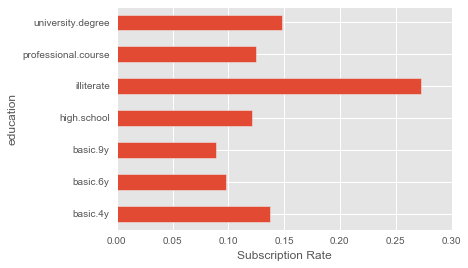

In [142]:
# Plotting what we previsously grouped!
plt.style.use("ggplot")
bank_df_grouped_edu = bank_df_full.groupby(by = "education")
subscirbe_rate_edu = bank_df_grouped_edu.tran_y.sum() / bank_df_grouped_edu.tran_y.count()
ax = subscirbe_rate_edu.plot(kind = "barh")
plt.xlabel("Subscription Rate")

We also have shown the subscription rate statistics and graph according to the martial status.

In [143]:
# Aggregate by marital status and count subscribe rates.
bank_df_grouped_marital = bank_df_full.groupby(by = "marital")
print(bank_df_grouped_marital.tran_y.sum())
print('------------------------------------')
print(bank_df_grouped_marital.tran_y.count())
print('------------------------------------')
print(bank_df_grouped_marital.tran_y.sum() / bank_df_grouped_marital.tran_y.count())

marital
divorced     410
married     2055
single      1393
Name: tran_y, dtype: int64
------------------------------------
marital
divorced     3552
married     17487
single       9439
Name: tran_y, dtype: int64
------------------------------------
marital
divorced    0.115428
married     0.117516
single      0.147579
Name: tran_y, dtype: float64


We can see that people have different marital status have similar subscription rate. 

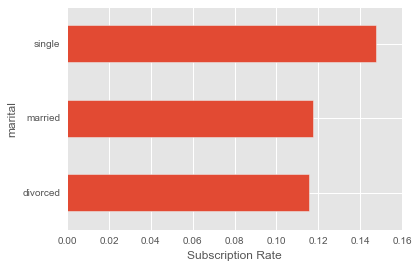

In [144]:
# Plotting what we previsously grouped!
plt.style.use("ggplot")
bank_df_grouped_marital = bank_df_full.groupby(by = "marital")
subscirbe_rate_marital = bank_df_grouped_marital.tran_y.sum() / bank_df_grouped_marital.tran_y.count()
ax = subscirbe_rate_marital.plot(kind = "barh")
plt.xlabel("Subscription Rate")

We have shown statistics for subscription rate according to the Job profile and plotted the graph accordingly. 

In [145]:
# Aggregate by job and count subscribe rates.
bank_df_grouped_job = bank_df_full.groupby(by = "job")
print(bank_df_grouped_job.tran_y.sum())
print('------------------------------------')
print(bank_df_grouped_job.tran_y.count())
print('------------------------------------')
print(bank_df_grouped_job.tran_y.sum() / bank_df_grouped_job.tran_y.count())

job
admin.           1215
blue-collar       452
entrepreneur      101
housemaid          87
management        286
retired           357
self-employed     132
services          258
student           203
technician        641
unemployed        126
Name: tran_y, dtype: int64
------------------------------------
job
admin.           8734
blue-collar      5674
entrepreneur     1089
housemaid         690
management       2311
retired          1215
self-employed    1092
services         2856
student           610
technician       5469
unemployed        738
Name: tran_y, dtype: int64
------------------------------------
job
admin.           0.139112
blue-collar      0.079662
entrepreneur     0.092746
housemaid        0.126087
management       0.123756
retired          0.293827
self-employed    0.120879
services         0.090336
student          0.332787
technician       0.117206
unemployed       0.170732
Name: tran_y, dtype: float64


It is evident that the student have highest subscription rate of 33% followed by retired people.

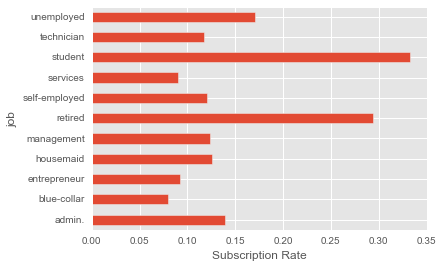

In [146]:
# Plotting what we previously grouped!
plt.style.use("ggplot")
bank_df_grouped_job = bank_df_full.groupby(by = "job")
subscirbe_rate_job = bank_df_grouped_job.tran_y.sum() / bank_df_grouped_job.tran_y.count()
ax = subscirbe_rate_job.plot(kind = "barh")
plt.xlabel("Subscription Rate")

The below graph shows that the people who are divorced and illiterate have highest subscription rate but the number of people in this category is very low hence this graph is not reliable.

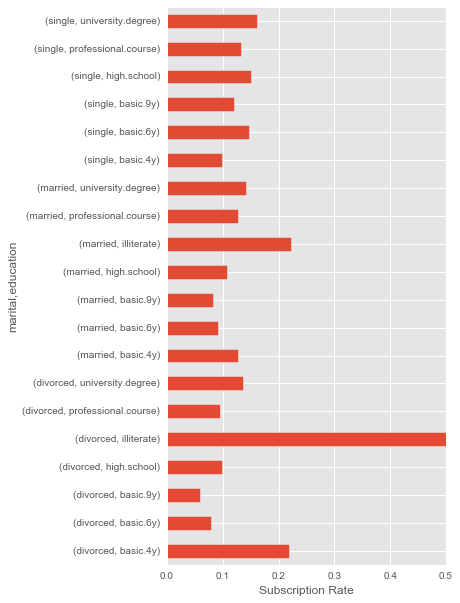

In [147]:
plt.style.use('ggplot')
bank_df_grouped_m_edu = bank_df_full.groupby(by = ["marital", "education"])
subscirbe_rate_m_edu = bank_df_grouped_m_edu.tran_y.sum() / bank_df_grouped_m_edu.tran_y.count()
ax = subscirbe_rate_m_edu.plot(kind = "barh", figsize = (5, 10))
plt.xlabel("Subscription Rate")

We tried to find the relationship between marital status and Job profile and the subscription rate and got interesting result as observed in the below graph.
The results are very important as it gives us a clear idea of how the job profile and marital status can influence the decision of a person to have a term deposit in bank.
Certainly a married person with admin job profie has high likelihood of subscribing for a term deposit.

tran_y                     0    1
marital  job                     
divorced admin.          953  120
         blue-collar     434   39
         entrepreneur    132   10
         housemaid        83   13
         management      224   34
         retired         193   80
         self-employed    96   16
         services        369   27
         student           3    3
         technician      571   58
         unemployed       84   10
married  admin.         3683  573
         blue-collar    3646  281
         entrepreneur    693   71
         housemaid       449   59
         management     1417  193
         retired         610  267
         self-employed   585   70
         services       1430  131
         student          25    8
         technician     2543  330
         unemployed      351   72
single   admin.         2883  522
         blue-collar    1142  132
         entrepreneur    163   20
         housemaid        71   15
         management      384   59
         retir

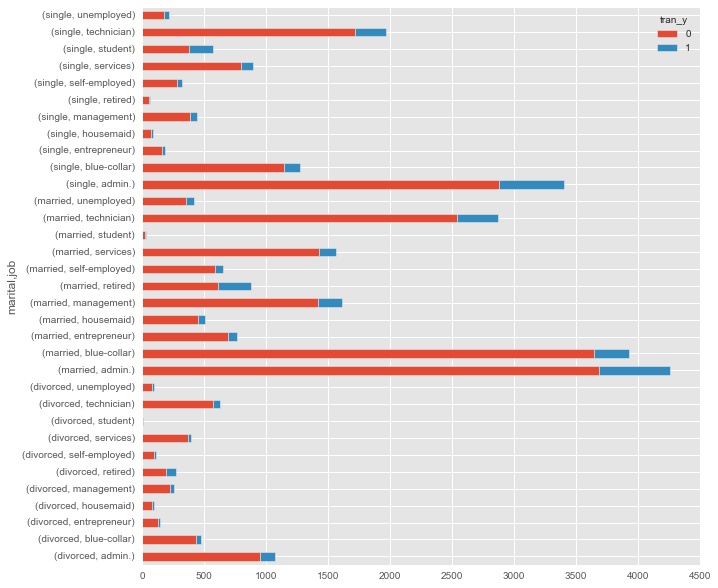

In [148]:
# We use the cross tab operator to group marital status and job and find the relationship with the subscription rate.
subscribe = pd.crosstab([bank_df_full["marital"], bank_df_full["job"]], bank_df_full["tran_y"])
print(subscribe)
print("-------------------------------------------------------------------")
subscribe.plot(kind = "barh", stacked = True, figsize = (10, 10))

In [149]:
# Break up the age variable.
bank_df_full["age_range"] = pd.cut(bank_df_full["age"], [15, 35, 55, 75, 95], 4, labels = ["youth", "adult", "middle aged", "senior"])
bank_df_full["age_range"].describe()

count     30478
unique        4
top       adult
freq      14446
Name: age_range, dtype: object

In the figure below, we show the relationship between age group with job and subscription rate.

job            age_range  
admin.         youth          0.150250
               adult          0.119418
               middle aged    0.225146
blue-collar    youth          0.086400
               adult          0.070782
               middle aged    0.130208
               senior         0.000000
entrepreneur   youth          0.089552
               adult          0.088889
               middle aged    0.139241
housemaid      youth          0.085526
               adult          0.096386
               middle aged    0.238938
               senior         0.700000
management     youth          0.122642
               adult          0.116091
               middle aged    0.178744
               senior         0.000000
retired        youth          0.111111
               adult          0.109005
               middle aged    0.300487
               senior         0.497110
self-employed  youth          0.126033
               adult          0.113806
               middle aged    0.13888

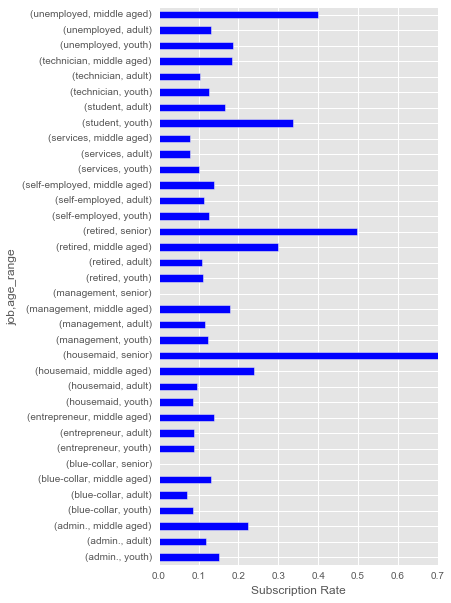

In [150]:
plt.style.use('ggplot')
bank_df_grouped_job_age_range = bank_df_full.groupby(by = ["job", "age_range"])
subscirbe_rate_job_age_range = bank_df_grouped_job_age_range.tran_y.sum() / bank_df_grouped_job_age_range.tran_y.count()
ax = subscirbe_rate_job_age_range.plot(kind = "barh", figsize = (5, 10), color='blue')
plt.xlabel('Subscription Rate')
print(subscirbe_rate_job_age_range)

In the below graph, we show the relationship between age group with education and subscription rate.

education            age_range  
basic.4y             youth          0.081633
                     adult          0.057983
                     middle aged    0.284047
                     senior         0.572650
basic.6y             youth          0.105727
                     adult          0.089412
                     middle aged    0.141026
                     senior         0.166667
basic.9y             youth          0.095065
                     adult          0.076092
                     middle aged    0.157143
                     senior         0.166667
high.school          youth          0.133159
                     adult          0.096461
                     middle aged    0.228022
                     senior         0.357143
illiterate           youth          0.333333
                     adult          0.250000
professional.course  youth          0.132729
                     adult          0.096516
                     middle aged    0.250000
                     s

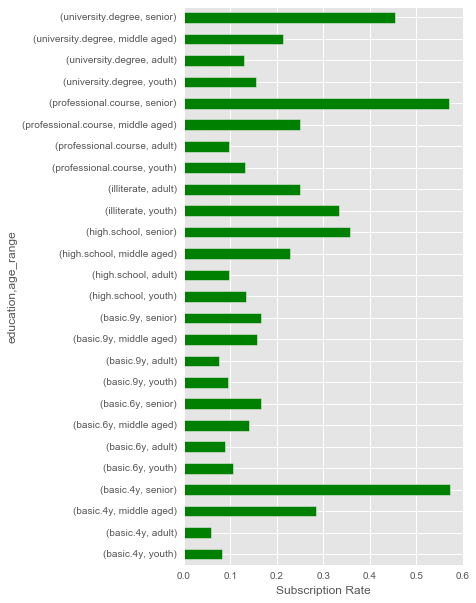

In [151]:
plt.style.use('ggplot')
bank_df_grouped_edu_age_range = bank_df_full.groupby(by = ["education", "age_range"])
subscirbe_rate_edu_age_range = bank_df_grouped_edu_age_range.tran_y.sum() / bank_df_grouped_edu_age_range.tran_y.count()
ax = subscirbe_rate_edu_age_range.plot(kind = "barh", figsize = (5, 10), color='green')
plt.xlabel('Subscription Rate')
print(subscirbe_rate_edu_age_range)

In the below graph, we show the correlations coefficients between the possible pairs of variables in the Dataframe.

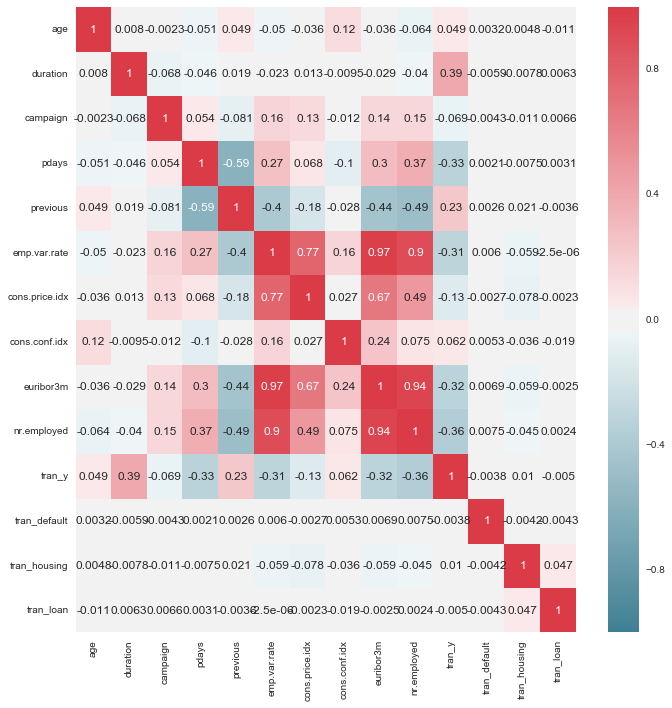

In [152]:
# plotting the correlation matrix.
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.set(style = "darkgrid")
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(bank_df_full.corr(), cmap = cmap, annot = True)
f.tight_layout()

In the below graph, we show the relationship between age and marital status with the personal loan. We can see that people with ages from 30 to 40 all have loans even though their marital status are different.

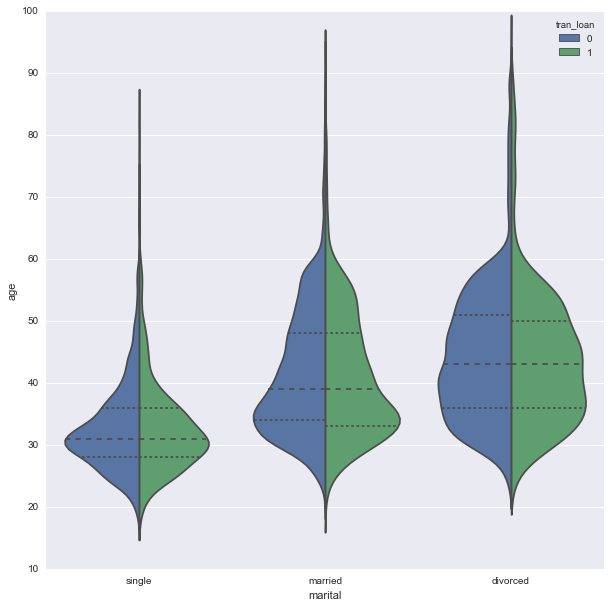

In [153]:
f, ax = plt.subplots(figsize = (10, 10))
sns.violinplot(x = "marital", y = "age", hue = "tran_loan", data = bank_df_full, split = True, inner = "quart")

In the below graph, we analyze if the customer of different ages and education background having housing loans. We observe that middle aged people across all education backgrounds have housing loans and it may affect their decision to subscribe for term deposit.

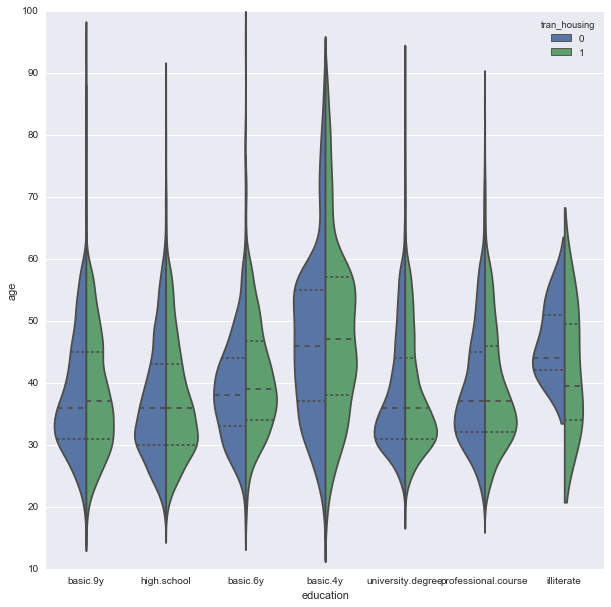

In [154]:
f, ax = plt.subplots(figsize = (10, 10))
sns.violinplot(x = "education", y = "age", hue = "tran_housing", data = bank_df_full, split = True, inner = "quart")

In the below graph, we observe a boxplot graph between the duration spoken to customer on call and the successful subscription. We can observe that there are lot of outliers in the duration of the calls to customer.

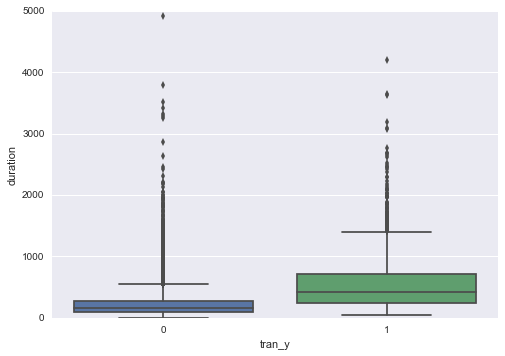

In [155]:
sns.boxplot(bank_df_full.tran_y, bank_df_full.duration)

## Dimensionality Reduction by PCA

In [156]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
X = bank_df_full[["age", "duration","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]]
X_pca=pca.fit(X).transform(X)

In [157]:
var= pca.explained_variance_ratio_
var

array([  9.22276572e-01,   7.59709664e-02,   1.43755861e-03,
         3.01842699e-04,   1.19947008e-05,   5.71473143e-07,
         4.94141621e-07])

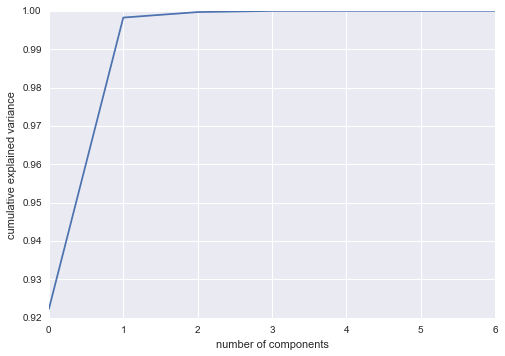

In [158]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

The above plot shows that one component results in variance close to nearly 99.98%.

**Are there other features that could be added to the data or created from existing features?  Which ones? **

We think that if there was feature showing the gender (M/F) of the contacted customer. We can use this feature to see gender's influence on subscription rate
Also If we have the geographical data for the clients then we can find if the economic condition of that area affect the subscribe rate by comparing the Euribor rate, consumer price index.

## Exceptional Work.
The fundamental goal of machine learning is to understand the relationship between the independent variable(s) and the dependent variable.
For this dataset,  the Classification goal is to predict if the client will subscribe(1 / 0) a term deposit (variable tran_y).
We will build a predictive model for this classification problem and use it to predict whether a new client will subscribe or not.

### Splitting the Dataset.
In machine learning, we want to use training data, which is historical and contains the labelled outcomes for each observation, to build a classifier that will return predicted labels for new, unlabelled data. In other words, we want the classifier performs well on the training and generalize to future data. In order to achieve this goal, we apply cross-validation technique to randomly splitting our dataset into a training data and a test set, then fitting the model using the training set and making predictions on the test set. We'll randomly select 80% of the observations in the bank_df_full Dataframe as the training set and the remaining 20% as the test set.

In [159]:
import numpy as np
bank_df_full["actual_label"] = bank_df_full["tran_y"]
bank_df_excep = bank_df_full.drop("tran_y", axis = 1)
shuffled_index = np.random.permutation(bank_df_excep.index)
shuffled_bank_df_excep = bank_df_excep.loc[shuffled_index]

train = shuffled_bank_df_excep.iloc[0:int(len(shuffled_bank_df_excep) * 0.8)]
test = shuffled_bank_df_excep.iloc[int(len(shuffled_bank_df_excep) * 0.8) : len(shuffled_bank_df_excep)]
print(shuffled_bank_df_excep.head())
# Noe that we've split up the dataset into a training and a test set.

       age          job  marital          education    contact month  \
12046   34  blue-collar  married           basic.9y   cellular   nov   
2218    27  blue-collar  married           basic.9y  telephone   may   
22652   45   management  married  university.degree   cellular   jul   
28359   56    housemaid  married  university.degree   cellular   apr   
9213    32  blue-collar   single           basic.9y   cellular   may   

      day_of_week  duration  campaign  pdays      ...       emp.var.rate  \
12046         tue       133         2    999      ...               -0.1   
2218          thu        44         1    999      ...                1.1   
22652         thu       843         1    999      ...                1.4   
28359         mon       148         1    999      ...               -1.8   
9213          tue       340         2    999      ...               -1.8   

      cons.price.idx  cons.conf.idx  euribor3m  nr.employed  tran_default  \
12046         93.200          -42

### Train a logistic regression model on just the training set. 
Due to data quality and computationally demanding issues. We'll only use "tran_default", "tran_housing", "tran_loan", "campaign" and "previous" columns in training set to train the model.

In [160]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(train[["tran_default", "tran_housing", "tran_loan", "campaign", "previous"]], train["actual_label"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

A logistic regression model outputs a probability value. In binary classification, if the probability value is larger than a certain threshold probility, we assign the label for that row to 1 or otherwise.

### Predict Labels

In [161]:
fitted_labels = logistic_model.predict(test[["tran_default", "tran_housing", "tran_loan", "campaign", "previous"]]) 
print(fitted_labels[:20])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Evaluate the effectiveness of this classification model.

The simplest way to determine the effectiveness of a classification model is prediction accuracy. And we need to calculate what fraction of the predictions were correct(actual label matched predicted label)?
Prediction accuracy boils down to the number of labels that were corectly predicted divided by the total number of observations:
#### Accuracy = of Correctly Predicted / of Observations

In [162]:
test["predicted_label"] = fitted_labels
matches = test["predicted_label"] == test["actual_label"]
correct_predictions = test[matches]
accuracy = len(correct_predictions) / len(test)
print(accuracy)

0.8743438320209974


/Users/saurabhshinde/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


It looks like the raw accuracy is around 87% which is much better than randomly gusssing the label(which would result in around a 50% accuracy). 

#### Sensitivity and Specificity

Accuracy doesn't help us discriminate between the different types of outcomes a binary calssification model can make.
So we calculate the Sensitivity and Specificity to evaluate the effectiveness of this model.

Sensitivity helps us answer the question:
How effective is this model at identifying positive outcomes?
That is to say, of all of the clients that subscribed to term deposit, how many did the model correctly predicted.

Specificity helps us answer the question:
How effective is this model at identifying negative outcomes?
That is to say, of all of the clients that not subscribed to term deposit, what proportion were correctly predicted.

In [163]:
true_positive_filter = (test["predicted_label"] == 1) & (test["actual_label"] == 1)
true_positives = len(test[true_positive_filter])
false_negative_filter = (test["predicted_label"] == 0) & (test["actual_label"] == 1)
false_nagatives = len(test[false_negative_filter])
sensitivity = true_positives / (true_positives + false_nagatives)
print(sensitivity)

print("-----------------------------------------------")

false_positive_filter = (test["predicted_label"] == 1) & (test["actual_label"] == 0)
false_positives = len(test[false_positive_filter])
true_negative_filter = (test["predicted_label"] == 0) & (test["actual_label"] == 0)
true_negatives = len(test[true_negative_filter])
specificity = (true_negatives) / (false_positives + true_negatives)
print(specificity)

0.041343669250646
-----------------------------------------------
0.9954904171364148


It turns out that our model is very good at predicting the client who are not going to subscribe the term deposit.

#### ROC Curve
For each observation, scikit-learn uses the logit function, with the optimal parameter value for the data the model was trained on, to return a probability value. If the probability value is larger than 50%, the perdicted label is 1 and if it's less than 50%, the predicted label is 0. In general, however, 50% is not the optimal discrimination threshold and we need a way to vary the threshold and compute the measures at each threshold.

We can draw the reciever operator curve, and it allows us to understand a classification model's performance as the discrimination threshold is varied.

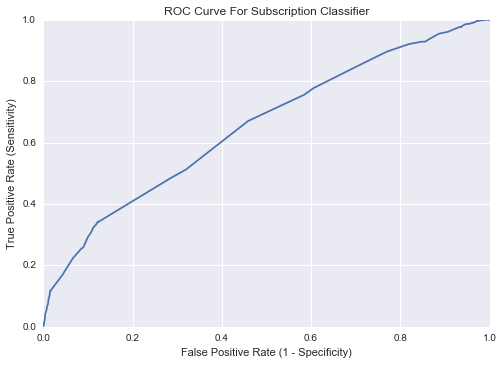

In [164]:
from sklearn import metrics
probabilities = logistic_model.predict_proba(test[["tran_default", "tran_housing", "tran_loan", "campaign", "previous"]])
fpr, tpr, thresholds = metrics.roc_curve(test["actual_label"], probabilities[:,1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("ROC Curve For Subscription Classifier")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.grid(True)
# We can use the scikit-learn roc-curve function. This function will calculate the false positive rate and true positive rate for varying discrimination thresholds until both reach 0%. 

By looking at the ROC curve. We can select an appropriate threshold based on our priorities. Given the fact that very few clients subscribe to term deposit and most of them reject it. The bank probably more concerned with a higher True Positive Rate than a low False Positive Rate. The bank benefits the most if it does a wonderful job predicting a select number of clients that deserve to be selected.  

In [165]:
# Define a function that accepts a threshold and prints sensitivity and specificity.
def evaluate_threshold(threshold):
    print ('Sensitivity:', tpr[thresholds > threshold][-1])
    print ('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [166]:
evaluate_threshold(0.5)

Sensitivity: 0.0413436692506
Specificity: 0.995490417136


In [167]:
evaluate_threshold(0.3)

Sensitivity: 0.116279069767
Specificity: 0.983840661405


We can decrease the threshold for predicting subscription in order to increase the sensitivity. Because we want the classifier to be more sensitive to positive instances.

#### Area under the curve or AUC
AUC is useful as a single number summary of classifier peformance. It describes the probability that the classifier will rank a random positive observation higher than a random negative observation. Since randomly guessing converges to a probability of 0.5, the higher the AUC the more accurate the model seems to be.

In [168]:
from sklearn.metrics import roc_auc_score
probabilities = logistic_model.predict_proba(test[["tran_default", "tran_housing", "tran_loan", "campaign", "previous"]])
auc_score = roc_auc_score(test["actual_label"], probabilities[:,1])
print(auc_score)

0.653969020409


With an AUC score of about 65%, our model does a little bit better than 50%, which would correspond to randomly guessing. 

# Conclusion


The AUC score above imply that using just several features in our model to predict subscription isn’t enough. We can use more attributes to train the model and choose a threshold that fit to our business priority to improve the prediction accuracy and business effectiveness of our classification model.

## Citation

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014